In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
batch_2 = anndata.read("./write/tgfb1-3-batch2.h5ad")

In [3]:
batch_per_gene = []
fc_per_gene = []
genes = []
fc_inhibitor_per_gene = []

with open("microarray_TGFb1_forMarcell.csv", "r") as f:
    current_batch = ""
    lines_skipped = 0
    
    for line in f:           
        if ">>" in line and 'all' not in line:
            line = line.split()
            current_batch = line[1]
            lines_skipped = 0
            continue
        
        if current_batch and lines_skipped < 2:
            lines_skipped += 1
            continue

        if not current_batch:
            continue
        
        line = [field for field in line.rstrip().rstrip(',').split(',')]
        
        try:
            if current_batch == "AB.only":
                gene = line[1]
                fc = float(line[5])
                genes.append(gene)
                fc_per_gene.append(fc)
                fc_inhibitor_per_gene.append(float(line[9]))
                batch_per_gene.append(current_batch)

        except:
            continue

In [4]:
len(genes)

685

In [5]:
len(batch_per_gene)

685

In [6]:
len(fc_per_gene)

685

In [7]:
fc_per_gene

[-15.02274509,
 -6.899958848,
 -5.968761288,
 -5.959292777,
 -5.141380692,
 -4.540275008,
 -3.993972599,
 -3.722138462,
 -3.559630243,
 -3.339409983,
 -3.20769551,
 -3.116473028,
 -3.076349862,
 -2.937501146,
 -2.869373014,
 -2.837243799,
 -2.826259982,
 -2.777834152,
 -2.73299538,
 -2.691628389,
 -2.661172696,
 -2.656106288,
 -2.637747325,
 -2.526937967,
 -2.515130537,
 -2.460725588,
 -2.446403637,
 -2.434217593,
 -2.413336183,
 -2.405421419,
 -2.400726626,
 -2.390329345,
 -2.366258617,
 -2.338460725,
 -2.328078174,
 -2.288552058,
 -2.280498461,
 -2.19597778,
 -2.194821797,
 -2.129389892,
 -2.09618352,
 -2.068733498,
 -2.067187878,
 -2.056877935,
 -2.05673717,
 -2.040737045,
 -2.032705373,
 -2.026823524,
 -2.024235721,
 -2.012398959,
 -2.012022428,
 -2.00324265,
 -1.980322986,
 -1.97956381,
 -1.979536524,
 -1.97347377,
 -1.966792211,
 -1.947378746,
 -1.941834332,
 -1.932477163,
 -1.911361531,
 -1.88385738,
 -1.863441353,
 -1.85749311,
 -1.83567783,
 -1.831554447,
 -1.823436316,
 -1.81

In [8]:
fc_inhibitor_per_gene

[11.7243172,
 6.257558647,
 3.401610358,
 3.692517113,
 3.516332563,
 3.940411324,
 4.542977513,
 2.508999078,
 3.618819972,
 3.298642463,
 3.158531397,
 3.056584805,
 4.077756042,
 5.633591085,
 2.497562473,
 2.735807732,
 2.727430005,
 2.343466672,
 2.829160258,
 2.586600591,
 2.839527907,
 3.281654984,
 2.425251925,
 4.736242462,
 2.705318368,
 2.670240965,
 2.316597564,
 3.027056162,
 2.509264346,
 3.144588058,
 2.939590602,
 2.509205248,
 2.871986167,
 3.332272601,
 2.755480316,
 2.054555569,
 3.518203539,
 2.563068961,
 2.27602502,
 2.565026213,
 2.126202959,
 1.929942803,
 2.609813407,
 2.139103057,
 2.296682501,
 2.036075415,
 2.092395717,
 2.381931191,
 2.982499598,
 1.779595795,
 1.724723604,
 1.919026813,
 3.108003813,
 2.324083708,
 1.861153742,
 1.986212256,
 3.070627943,
 2.304435366,
 1.669329526,
 2.74047527,
 1.70656986,
 1.879866821,
 1.624197864,
 2.182563855,
 2.421403915,
 2.040415366,
 1.446306385,
 2.540379375,
 1.850298159,
 2.779731557,
 2.365224528,
 2.1175153

In [9]:
list(zip(fc_per_gene, fc_inhibitor_per_gene))

[(-15.02274509, 11.7243172),
 (-6.899958848, 6.257558647),
 (-5.968761288, 3.401610358),
 (-5.959292777, 3.692517113),
 (-5.141380692, 3.516332563),
 (-4.540275008, 3.940411324),
 (-3.993972599, 4.542977513),
 (-3.722138462, 2.508999078),
 (-3.559630243, 3.618819972),
 (-3.339409983, 3.298642463),
 (-3.20769551, 3.158531397),
 (-3.116473028, 3.056584805),
 (-3.076349862, 4.077756042),
 (-2.937501146, 5.633591085),
 (-2.869373014, 2.497562473),
 (-2.837243799, 2.735807732),
 (-2.826259982, 2.727430005),
 (-2.777834152, 2.343466672),
 (-2.73299538, 2.829160258),
 (-2.691628389, 2.586600591),
 (-2.661172696, 2.839527907),
 (-2.656106288, 3.281654984),
 (-2.637747325, 2.425251925),
 (-2.526937967, 4.736242462),
 (-2.515130537, 2.705318368),
 (-2.460725588, 2.670240965),
 (-2.446403637, 2.316597564),
 (-2.434217593, 3.027056162),
 (-2.413336183, 2.509264346),
 (-2.405421419, 3.144588058),
 (-2.400726626, 2.939590602),
 (-2.390329345, 2.509205248),
 (-2.366258617, 2.871986167),
 (-2.33846072

In [10]:
interesting_indices = [i for i, (left, right) in enumerate(list(zip(fc_per_gene, fc_inhibitor_per_gene))) if left > 1 and right < -1]

In [11]:
#matrix = pandas.DataFrame({"gene": genes, "batch" : batch_per_gene, "fc": fc_per_gene})

In [12]:
#interesting_genes = matrix.loc[matrix['batch'] == 'A.only']

In [13]:
#interesting_genes

In [14]:
#interesting_genes = list(interesting_genes['gene'])

In [15]:
interesting_genes = np.array(genes)[interesting_indices]

In [16]:
batch_2

AnnData object with n_obs × n_vars = 7058 × 1346 
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'gene_names', 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [17]:
len(interesting_genes)

338

In [18]:
common_genes = set(batch_2.var.index).intersection(set(interesting_genes))

In [19]:
len(common_genes)

29

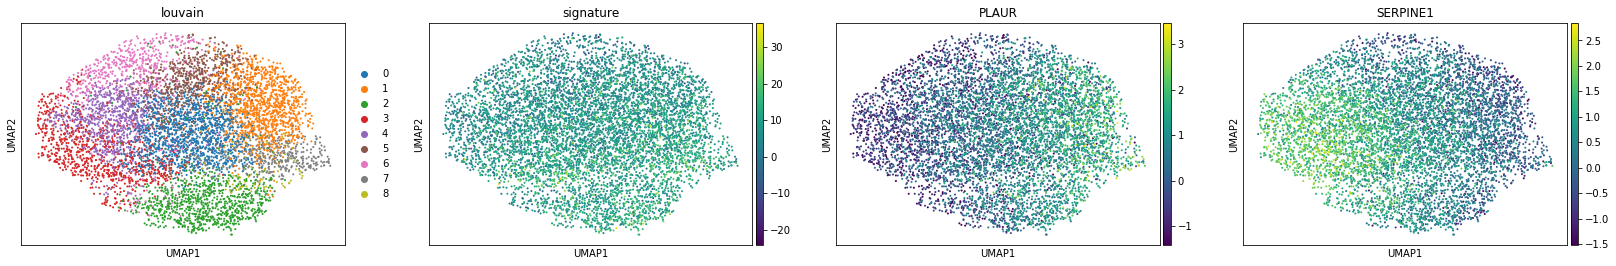

In [20]:
batch_2.obs["signature"] = batch_2[:,list(common_genes)].X.sum(1)
sc.pl.umap(batch_2, color=['louvain', 'signature', "PLAUR", "SERPINE1"])